# Mars Uniform Dataset

In [1]:
# Get everything in line before we start
import sys
sys.path.append('../../')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Optimisation import HSS
from Trajectory import *
import pandas as pdNo
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [36]:
# Assemble each core's dataset into one
'''
sets = [1,2,3,4]
ds = []
for i in sets:
    path = '../../Data/Mars/HSS_10_Alpha_' + str(i) + '.npy'
    z = np.load(path)
    ds.append(z)
ds = np.vstack(ds)
np.save('../../Data/Mars/HSS_10_Alpha_Full.npy', ds)
'''
ds = np.load('../../Data/Mars/HSS_10_Alpha_Full.npy')
ds.shape

(8000, 148)

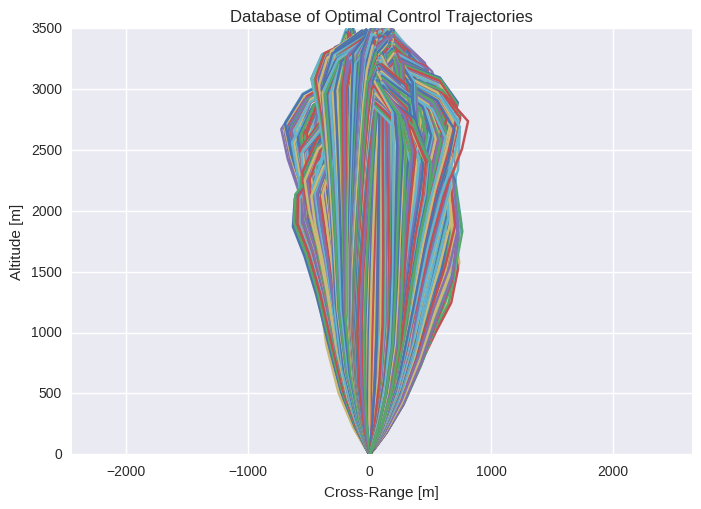

In [4]:
# Decode each trajectory
plt.close('all')
model = Point_Lander_Drag()
prob = HSS(model, nsegs=10)
dpts = []
for traj in ds:
    tf, sb, cb, s, c = prob.Decode(traj)
    plt.plot(s[:,0], s[:,1])
    plt.axes().set_aspect('equal', 'datalim')
    s = np.vstack((s, sb[1:,:]))
    c = np.vstack((c, cb[1:,:]))
    dp = np.hstack((s, c))
    dpts.append(dp)
traj = np.vstack(dpts)
traj.shape

plt.xlabel('Cross-Range [m]')
plt.ylabel('Altitude [m]')
plt.title('Database of Optimal Control Trajectories')
#plt.savefig('../../Data/Figs/New/Traj.pdf', format='pdf',
        #transparent=True, bbox_inches='tight')
plt.show()


In [6]:
dpts = array(dpts)
dpts

array([[[    0.        ,  3000.        ,     0.        , ...,
          7500.        ,     0.        ,     0.89024803],
        [   -0.        ,  2730.65313186,    -0.        , ...,
          7500.        ,     0.        ,     0.        ],
        [   -0.        ,  2403.56020309,    -0.        , ...,
          7500.        ,     0.        ,     0.10739033],
        ..., 
        [   -0.00001968,   303.97896008,     0.00000155, ...,
          7172.81473954,     1.        ,     1.57079626],
        [   -0.00000775,   110.24286023,     0.00000412, ...,
          7058.30407739,     1.        ,     1.5707963 ],
        [    0.00000053,    12.34785184,    -0.00000014, ...,
          6943.79341524,     1.        ,     1.57079633]],

       [[    1.43082354,  2984.9355836 ,    -2.10936435, ...,
          7502.35286093,     0.        ,     2.35634253],
        [   -6.98330019,  2717.67947159,    -2.09832096, ...,
          7502.35286093,     0.        ,     3.14159265],
        [  -15.34863803,

(8000, 21, 7)

In [9]:
shape = (8000, 11, 8)
ntraj, nnodes, nfeat = shape

trajs = np.empty(shape)
for i in range(ntraj):
    tf, sb, cb, s, c = prob.Decode(ds[i])
    t = np.linspace(0, tf, nnodes).reshape(nnodes,1)
    trajdp = hstack((s,c,t))
    trajs[i,:,:] = trajdp
np.save('../../Data/Mars/HSS_10_Traj', trajs)

In [19]:
trajs[:,0,1]

array([ 3000.        ,  2984.9355836 ,  2975.19269698, ...,  3085.38807286,
        3071.99658289,  3053.08441421])

In [ ]:
plt.close('all')
plt.plot(trajs[:,:,0], trajs[:,:,1],'.')
plt.show()

In [ ]:
np.save('../../Data/Mars/HSS_10_Alpha_Full_Tensor', dpts)

In [ ]:
dpts = np.load('../../Data/Mars/HSS_10_Alpha_Full_Tensor.npy')
dpts[0,:,4]

In [ ]:
dptss = np.empty(shape=(0,7))
for traj in dpts:
    dptss = np.vstack((dptss,traj))
dptss

In [ ]:
np.savetxt('../../Data/Mars/HSS_10_Alpha_Full_Tensor_Text',dptss)

In [ ]:
plt.close('all')
for traj in dpts:
    plt.subplot(121)
    plt.plot(traj[:,0], traj[:,1],'.')
    plt.axes().set_aspect('equal', 'datalim')
    plt.subplot(122)
    plt.plot(traj[:,2], traj[:,3],'.')
plt.show()

In [25]:
from ML import MLP
net = MLP('../../Data/Mars/Nets/Mars_Regular_20x4')

In [34]:
data = np.load('../../Data/Mars/HSS_10_Alpha_dps.npy')

0.0

In [27]:
iin = [0,1,2,3,4]
iout = [5,6]
layers = [20]*4

In [28]:
net.build(data, iin, iout, layers)

In [ ]:
import tensorflow as tf
sess = tf.Session()
dfp = pd.DataFrame(net.predict(data[:,iin], sess), columns = ['$u_p$', '$\\theta_p$'])

In [ ]:
df = pd.DataFrame(data, columns = ['$x$', '$y$', '$v_x$', '$v_y$', '$m$', '$u$', '$\\theta$'])

In [ ]:
from Trajectory import Point_Lander_Drag

# Controlled Trajectory

In [35]:
# Random state samples
test_si = data[]
test_si = data[np.random.choice(range(len(data)), 10),0:5]
si = test_si[0]

SyntaxError: invalid syntax (<ipython-input-35-fd1d0c6b1fbe>, line 2)

In [ ]:
model = Point_Lander_Drag(si)
model.controller = Neural(model, 'HSS_10_Alpha', (20,4)).Control

In [ ]:
# Time should not matter much
tf = 50
# The resolution of the integration
nnodes = 200

In [ ]:
# We now propagate the model with the trained neural network
sl, cl = [], []
for si in test_si:
    s, c = model.Propagate.Neural(si, tf, nnodes, False)
    sl.append(s)
    cl.append(c)

In [ ]:
plt.close('all')
for s,c in zip(sl, cl):
    gi = s[:,1]>0
    plt.figure(1)
    plt.plot(s[gi,0], s[gi,1])
    plt.axes().set_aspect('equal', 'datalim')
    plt.xlim(model.silb[0], model.siub[0])
    plt.ylim(model.slb[1], model.siub[1])
    plt.xlabel('Cross-Range [m]')
    plt.ylabel('Altitude [m]')
    plt.title('Neuro-Controlled Trajectories (20x4 Network)')
    #plt.savefig('../../Data/Figs/New/20x4_Traj.pdf', format='pdf',transparent=True, bbox_inches='tight')
    plt.figure(2)
    plt.plot(s[s[:,4]>6000,4])
    plt.ylabel('Mass [kg]')
    plt.xlabel('Node Index')
    plt.title('Fuel Expenditure (20x4 Network)')
    #plt.savefig('../../Data/Figs/New/20x4_Fuel.pdf', format='pdf',transparent=True, bbox_inches='tight')
    plt.figure(3)
    plt.plot(c[:,0],'.')
    plt.xlabel('Node Index')
    plt.ylabel('Thrust Throttle')
    plt.title('Control Profile (20x4 Network)')
    #plt.savefig('../../Data/Figs/New/20x4_Throttle.pdf', format='pdf',transparent=True, bbox_inches='tight')
    plt.figure(4)
    #plt.plot(s[:,2])
    plt.plot(s[:,3])
    plt.xlabel('Node Index')
    plt.ylabel('Velocity [m/s]')
    plt.title('Velocity Profile (20x4 Network)')
    #plt.savefig('../../Data/Figs/New/20x4_Throttle.pdf', format='pdf',transparent=True, bbox_inches='tight')
    
plt.show()

In [ ]:
data.shape